In [2]:
import torch
from modules import GPT
from utils import CharDataSet, generate, perplexity_graph, load_model_metrics

In [4]:
stories_data = CharDataSet(128, dataset_path='./datasets/train.txt')   # takes ~5 min to execute for the first time.
V = stories_data.get_vocab_size()                                      # then the file is locally encoded, takes 1s to re-run. 

In [ ]:
stories_model, stories_params, stories_train_loss, stories_valid_loss = load_model_metrics(
    './runs/long_story_model_b128_t128_l12_h8_d768/long_story_model_b128_t128_l12_h8_d768_0_9000.pt', V)

In [7]:
print(generate(stories_model, stories_data, "I understand thee well", 100))

I understand thee well."" The powerful dog walked a deep slide and run away.

Lily was still under her head and put on her


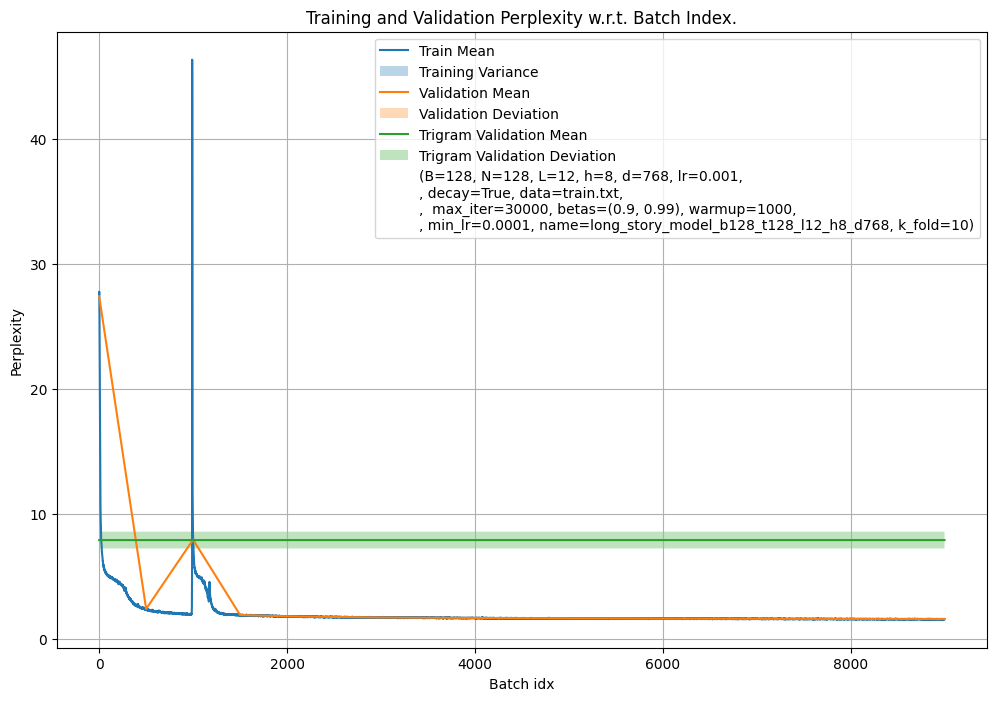

In [11]:
perplexity_graph(
    stories_train_loss.unsqueeze(0), stories_valid_loss.unsqueeze(0), 
    val_int=stories_params['val_int'], name="long_model", args=stories_params            
)

In [12]:
data_shakespear = CharDataSet(128, dataset_path='./datasets/shakespear_corpus.txt')
V = data_shakespear.get_vocab_size()


shake_model, shake_params, shake_train_loss, shake_valid_loss = load_model_metrics(
    './runs/long_model_b128_t256_l16_h16_d256/long_model_b128_t256_l16_h16_d256_0_5000.pt', V)

<All keys matched successfully>

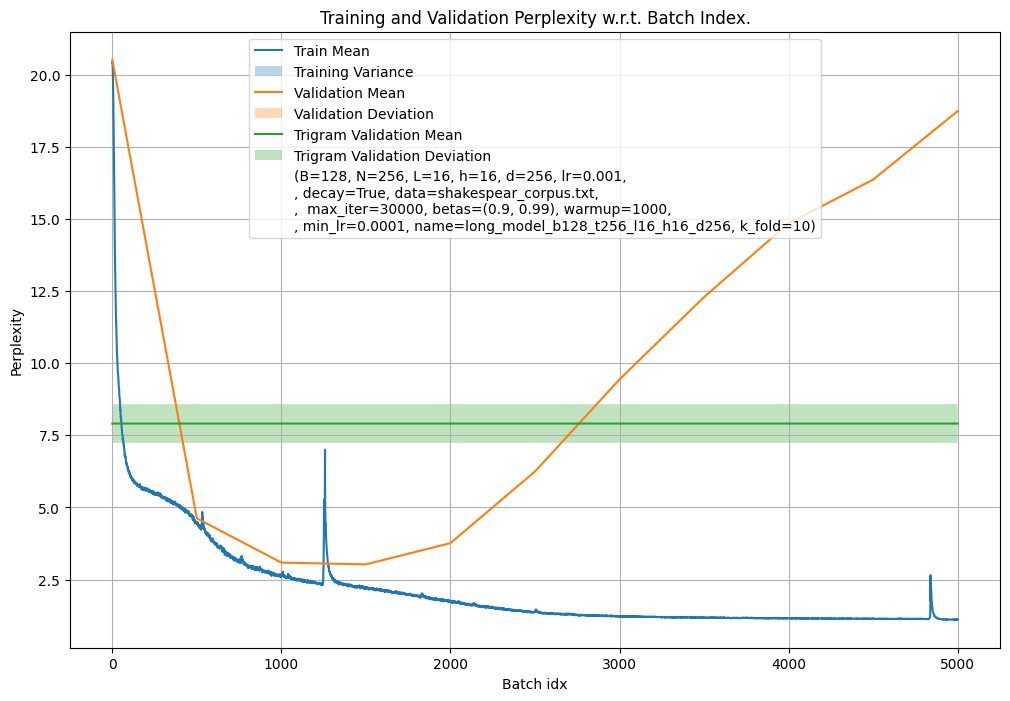

In [14]:
perplexity_graph(
    shake_train_loss.unsqueeze(0), shake_valid_loss.unsqueeze(0), 
    val_int=shake_params['val_int'], name="long_model", args=shake_params            
)

In [15]:
new_tokens = generate(model, data_shakespear,"FRANCOIS:\nI am getting married.\n\nJULIEN:", 100)
print(new_tokens)

FRANCOIS:
I am getting married.

JULIEN:
Is it not so? Vight Maria, we'll met.

PARIS:
In that begin I will longer entreate
To tribunes, mis


In [16]:
B = 128
N = 256  # context of up to 256 previous characters
L = 16
h = 16
d = 256


data_shakespear = CharDataSet(B, dataset_path='./datasets/shakespear_corpus.txt')

V = data_shakespear.get_vocab_size()

model = GPT(B, L, d, 3*d, N, h, V)

cpkt = torch.load("./runs/long_model_b128_t256_l16_h16_d256/long_model_b128_t256_l16_h16_d256_3_30000.pt", map_location=torch.device('cpu'))
model.load_state_dict(cpkt['model'])



<All keys matched successfully>

In [17]:
new_tokens = generate(model, data_shakespear,"FRANCOIS:\nI am getting married.\n\nJULIEN:", 100)
print(new_tokens)

FRANCOIS:
I am getting married.

JULIEN:
Thou know that I am not news of flesh and blood
With wonders of the times, shall not be seen.
Many 
